In [2]:
!pwd

/Users/leejunghoon/Documents/dev/2024/aiffel/Dlthon/SentenceClassification/Junghoon


In [85]:
!tree

.
├── DKTC
│   ├── README.md
│   ├── data
│   │   ├── sample_answersheet.json
│   │   ├── test.json
│   │   └── train.csv
│   └── members
│       ├── billie.png
│       ├── patrick.png
│       ├── ryan.png
│       ├── ryu.png
│       └── sophia.png
├── DataProcessing.ipynb
├── KakaoChatData
│   ├── AllData.csv
│   ├── KakaoData.csv
│   ├── LllamaJsonData.json
│   ├── README.md
│   ├── Utils
│   │   ├── Alpaca_data.py
│   │   ├── LlamaActor.py
│   │   ├── PreProcessing.py
│   │   └── PreProcessingA.py
│   ├── alpaca_data_CRLF.json
│   ├── alpaca_data_LF.json
│   ├── alpaca_data_LF_all_.json
│   ├── alpaca_data_all_CRLF.json
│   ├── nateon.csv
│   └── requirements.txt
├── README.md
└── result_data
    ├── submission.csv
    └── test.csv

7 directories, 27 files


In [3]:
import pandas as pd
import numpy as np


# Test dataset 처리 - csv변환
- 제공된 정보에 의하면, 테스트 데이터는 '협박', '갈취', '직장 내 괴롭힘', '기타 괴롭힘', '일반 대화' 등 5개 클래스 각 1백여 개로 구성

In [9]:
test_df = pd.read_json('./DKTC/data/test.json')
test_df.head()

,t_000,t_001,t_002,t_003,t_004,t_005,t_006,t_007,t_008,t_009,...,t_490,t_491,t_492,t_493,t_494,t_495,t_496,t_497,t_498,t_499
text,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,그러니까 빨리 말해. 선생님 제발 살려주십시오. 비밀번호 틀릴 때마다 손톱 하나씩...,그 사람 누구냐? 누구말하는거야? 다 알면서 모른척 하지마. 둘다 쏴버리기 전에...,야 저기야 닭꼬치 트럭왔다 응 그러네 그치? 너도 먹고 싶지? 어?나도? 그래 너 ...,안경 안쓰고 키작고통통해보이는 분이었는데 다안경안씀 쌍꺼풀없었던것같고 아 단발인가...,야 너 2학년 김민석 맞지? 네 맞는데요. 혹시 누구신가요? 내가 누군지 궁금하면 ...,...,철수야 말 들어야지 싫은데 철밥통 선생아 너 선생님한테 말버릇이 뭐야 야 내가 너말...,"양재 터널 입구 앞인데요. 사고가 났거든요? 위치가 양재 터널 맞으시죠? 네, 지금...",동생이쁘다. 나주라 안돼 우리동생건들지마. 왜 안되냐? 좀 달라고 니 목숨값으로 동...,혹시 나 오늘 2만원만 빌려주만 안돼? 응? 안돼. 나도 요즘 맨날 택시타느라 택시...,이봐 네? 누구세요? 입다물고 가진거 다내놔 경찰에 신고할거에요 할 수 있으면 해봐...,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...,엄마 저 그 돈 안해주시면 정말 큰일나요. 이유도 말하지 않고. 몇번째니 경민아....


- 500개에 대한 예측을 진행해야 함

In [10]:
# 행과 열이 뒤집어져있어서, 향후 사용을 위해 Transpose 진행

test_df = test_df.transpose()

In [11]:
test_df

,text
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...
t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...
...,...
t_495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...
t_496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...
t_497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...
t_498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...


In [14]:
!pwd

/Users/leejunghoon/Documents/dev/2024/aiffel/Dlthon/SentenceClassification/Junghoon


In [13]:
# 진행 후 데이터 내보내기
test_df.to_csv('./result_data/test.csv')

# 무작위 데이터 생성하기 (리더보드 테스트 용)

In [15]:

test_df['class'] = np.random.randint(0, 5, size=len(test_df))
test_df

,text,class
t_000,아가씨 담배한갑주소 네 4500원입니다 어 네 지갑어디갔지 에이 버스에서 잃어버렸나...,3
t_001,우리팀에서 다른팀으로 갈 사람 없나? 그럼 영지씨가 가는건 어때? 네? 제가요? ...,3
t_002,너 오늘 그게 뭐야 네 제가 뭘 잘못했나요.? 제대로 좀 하지 네 똑바로 좀 하지 ...,1
t_003,이거 들어바 와 이 노래 진짜 좋다 그치 요즘 이 것만 들어 진짜 너무 좋다 내가 ...,0
t_004,아무튼 앞으로 니가 내 와이파이야. .응 와이파이 온. 켰어. 반말? 주인님이라고도...,2
...,...,...
t_495,미나씨 휴가 결제 올리기 전에 저랑 상의하라고 말한거 기억해요? 네 합니다. 보고서...,4
t_496,교수님 제 논문에 제 이름이 없나요? 아 무슨 논문말이야? 지난 번 냈던 논문이...,2
t_497,야 너 네 저요? 그래 너 왜요 돈좀 줘봐 돈 없어요 돈이 왜 없어 지갑은 폼이...,2
t_498,야 너 빨리 안 뛰어와? 너 이 환자 제대로 봤어 안 봤어 어제 저녁부터 계속 보다...,3


In [16]:
test_df['class'].value_counts()

class
2    112
3    108
4    105
0     97
1     78
Name: count, dtype: int64

In [17]:
# Save dummy dataset for leaderboard
test_df.to_csv('./result_data/submission.csv')

Dummy dataset 제출결과

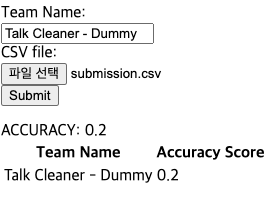

- 랜덤으로 데이터를 생성해서 제출 시, 0.2를 확인할 수 있었다.

# Train dataset에 일반 대화 추가하기

## 설명
- 본 코드는 DKTC(https://github.com/tunib-ai/DKTC) 데이터셋에 없는 일반 레이블 데이터셋을 추가하기 위해 카카오 채팅 데이터셋(https://github.com/Ludobico/KakaoChatData)의 일부를 '일반대화' 데이터로 추가 및 가공하는 코드입니다.


- 학습 데이터는 '협박', '갈취', '직장 내 괴롭힘', '기타 괴롭힘' 등 4개 클래스 각 약 1천 개로 구성
---
- 1. idx = 인덱스
- 2. class = 0~4
    class 0; 협박 대화
    class 1; 갈취 대화
    class 2; 직장 내 괴롭힘 대화
    class 3; 기타 괴롭힘 대화
- 3. conversation = \n으로 구분된 멀티턴 텍스트 대화

- 따라서, 데이터 비율에 맞게 1천개 정도 추가하고 진행하는 것이 좋을 것이라고 판단됨 
    - 데이터 증강 시에 조금 더 가져쓸지, 일반 대화도 증강할 지는 "논의"가 필요

In [ ]:
dktc_df = pd.read_csv('./DKTC/data/train.csv')

In [ ]:
dktc_df.columns

Index(['idx', 'class', 'conversation'], dtype='object')

In [ ]:
for col in dktc_df.columns[:-1] : 
    display(dktc_df[col].value_counts())

idx
0       1
2623    1
2625    1
2626    1
2627    1
       ..
1321    1
1322    1
1323    1
1324    1
3949    1
Name: count, Length: 3950, dtype: int64

class
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: count, dtype: int64

- idx는 고유 - drop을 해야 할 것
- 개별 클래스는 900 ~ 1100 사이로 분포함

In [59]:
dktc_df.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


In [ ]:
dktc_df['conversation'][0] # 다수의 발화가 발화자 지정 없이 구성되어 있다.

'지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선택 못하겠습니다. 한번만 도와주세요.\n 그냥 다 죽여버려야겠군. 이의 없지?\n 제발 도와주세요.'

In [71]:
pd.options.display.max_colwidth = 200

In [75]:
dktc_df[dktc_df['class'] == '직장 내 괴롭힘 대화'].sample(50) # 각 클래스 별로 Wordcloud를 진행하는 것은 어떨까?

,idx,class,conversation
3352,3352,직장 내 괴롭힘 대화,내일 혹시 어디가나?\n네? 아. 제가 약속이 있어서\n근데 월차 취소하는게 어떨까? 내일 회의 잡게\n아 미리 말씀하시지. 정말 죄송해요. 제가 내일 약속이 있어서\n뭐? 내일 회의 잡는다니가 월차 취소할게.\n정말 죄송합니다. 부장님 진짜 안될 것 같아요.\n승민씨 입사하자마자 회사에서 잘리고 싶어?\n아니요. 그건 아닌데. 정말 사정이 있어서....
2034,2034,직장 내 괴롭힘 대화,노대리\n네 과장님. 부르셨습니까?\n노대리 이 머리 꼬라지가 뭐여?\n네? 제머리에 문제가 있나요?\n노대리 일을 못하면 단정하기라도 하던가회사 출근할 때 머리도 안감고 뭐하는거야! 꼬질꼬질 해가지고는. 신경 좀 써!\n과장님 요즘 노대리 집사람하고 사이가 안좋았다고 합니다.\n그럼 그렇지. 집안도 제대로 건사하지 못하는게 회사 일이라고 똑 부러지...
3142,3142,직장 내 괴롭힘 대화,오사원 일처리도 빠르고 잘하는걸\n감사합니다.\n그럼 이것도 부탁해요\n네\n사원전표정리 부탁해요\n네?네.\n사원 자료 좀 준비해줘\n네? 그부분은 제 분야가 아닌.\n에이사원이 능력이 좋아서 그런거야다 사원한테 도움이 되는거라고. 부탁해\n네.\n사원! 전표에서 이부분이 틀렸잖아!!\n죄송합니다.그 부분은 제 영역이 아니라 실수한거 같아요.\n자...
2212,2212,직장 내 괴롭힘 대화,씨 왜 부장님한테 자꾸 꼬리쳐요?\n 네? 오해하시는 것 같아요. 그런 적 없어요\n 뭘 오해야. 맨날 눈웃음 치고 살랑살랑 꼬리치드만.\n 그런 적 없습니다\n 그럼 내가 지금 없는 말 지어낸다는 거에요?\n 아뇨 그게 아니라.\n 부장님 눈에 들어서 어떻게든 승진하고 싶나본데 꿈도 꾸지마요.\n 정말 그런 적 없습니다.\n 씨 자꾸 그런식으로 꼬...
679,679,직장 내 괴롭힘 대화,내일 미팅인거 알지?\n네! 미팅 준비는 다 되었습니다.\n내일 옷 좀 신경써서 입고 와주게나.\n네. 단정하게 입고 가면 될까요?\n단정한 것보다는 조금 자극적으로 입는게 어떤가\n네? 그렇지만 중요한 미팅인데.\n그러니까 그러라는 거지. 뭐 할 줄아는게 없으면 몸으로라도 떼워야하는거 아닌가?\n전.내일 한 임원으로 참석하는 걸로 알고있는데요.\n...
659,659,직장 내 괴롭힘 대화,에취 컥컥 오늘 공기가 탁한가봐요. 스으읍 오늘따라 숨이 더 잘 안 쉬어지네요.\n야 너 제발 회사에서 기침 좀 적당히 하면 안되냐? 시끄러워 죽겠어.\n제가 어릴 때부터 호흡기가 안 좋아서 천식 앓고 있어서 그래요. 죄송해요.\n그리고 너 맨날 들이마시는 그 뭐냐 호흡기? 네블라이저? 그것도 그만 흔들어. 정신 나가버리겠어 사람이\n이거 안 하면 ...
1039,1039,직장 내 괴롭힘 대화,김대리 이따가 퇴근 후에 뭐 일 있나?\n할 일이 조금 있기는 합니다\n그건 다음으로 미루고 내 아들내미 좀 공항에서 픽업해주겠나\n그건 조금 힘들 것 같습니다\n아니 왜\n저도 집에서 아이들을 돌봐야 하는데.\n자네 진급 안하고 싶나?\n아.아닙니다\n그럼 그렇게 말대꾸하고 거절할게 아니라 바로바로 알았다고 해야지\n네 알겠습니다.
1664,1664,직장 내 괴롭힘 대화,아니 현과장님 너무한거 아니에요?\n아니 내가 뭘 잘못했는데 귀찮게 하지말고 꺼지라니까\n뭔일인가 자네들\n아니 안 인턴이 자꾸만 시비걸고 일을 방해하네요\n야 안인턴 자네 미쳤나 자기 보다 윗 상사한테 하는 태도가 뭔가?\n아니 저 그렇게 방해 한게 아닌데\n시끄럽고 자네는 서류 정리나 해 안그래도 예민해 죽겠는데\n야 넌 현과장 하는거 절반만 해...
890,890,직장 내 괴롭힘 대화,대리님 제가 뭐하면 될까요?\n 생각 해보셨어요?\n 네? 무슨 생각을.\n 본인이 뭘해야할지 생각도 안해보고 물어봐요? 그정도 머리도 안되면서 무슨 회사 일을 하겠다고.\n 죄송합니다. 제가 아직 입사한 지 일주일밖에 안되서.\n 일주일동안은 생각안하고 뭐했어요? 그럴려고 회사에서 월급 주는 줄 아나. 동기들이랑 떠들 생각하지 말고 업무 생각이나 ...
3149,3149,직장 내 괴롭힘 대화,자 점심식사들 합시다\n 와 점심시간이다. 과장님 밥 어디서 먹죠 오늘은?\n 대리님. 오늘은 쌀국수 어때?\n 너무 좋죠\n 저 오늘 같이 먹어도 될까요?. 도시락을 못싸와서.\n 네. 뭐. 같이 먹어요\n 잠깐 저 화장실좀 다녀오겠습니다\n 잠깐 저도요!\n다들어디로 가셨지.\n아직도 밥을 못먹었네.\n어머 지선씨 한참을 찾았네 \n그러게 우리 ...


In [74]:
dktc_df[dktc_df['class'] == '갈취 대화'].sample(50) # 각 클래스 별로 Wordcloud를 진행하는 것은 어떨까?

,idx,class,conversation
1625,1625,갈취 대화,민수엄마 아니 요즘 밤 늦게 돌아다니더라?\n아 안녕하세요! 근데 무슨 말씀이세요?\n아니 저번에 골목에서 어떤 남자랑 안겨 있던데?\n네? 제가요 ? \n그래참 내가 민수아빠알까봐 얼마나 쫄렸는지 호호\n오해가 있으신 것 같은데 저 그런 적없어요.\n내 입이 그렇게 가벼운 건 아니지만 한 오백만원정도면 모른척 할 수 있을 거 같고\n네? 오백만원이...
3178,3178,갈취 대화,어서오세요 손님. 5500원 나왔습니다.\n지금금고빨리열어서 가진돈 다꺼내.\n예?손님이러시면안됩니다\n배에칼맞기싫으면 빨리꺼내\n사장님이 금고잘지키라고했는데.\n사장님이고뭐고 너진짜칼맞기싫으면 금고에든돈 다꺼내\n 오늘매출이좋지않아서.\n조금들어있는돈이라도다 꺼내놔 안꺼내면 진짜찌른다\n얼마나꺼낼까요.\n모조리다꺼내 좋은말할때.
1235,1235,갈취 대화,야 안녕\n .어 안녕.\n 나 오늘 택시비가 없는데 혹시 빌려줄 수 있어 ??\n 어.? 나 돈 없는데.\n 야 ! 너 맨날 돈 가지고 다니는거 다 알아 !\n 아니야.오늘은 없어.\n 이게 진짜 맞기 전에 내놔\n 나 없어\n 너 진짜 손 좀 봐야겠다\n 이러지마.!
230,230,갈취 대화,친구야 저번에 돈 빌려줘서 너무 고마웠어\n아. 응.\n근데 내가 오늘도 깜빡하고 지갑을 안 가져와서\n뭐 뭐라고?\n미안한데 한 번만 더 빌려주라\n오 오늘은 돈 없어.\n에이 거짓말 치지 마. 오늘 반티 산다고 돈 걷는 날이잖아 돈 가져왔으면서.\n안 돼. 반티 값 내야 돼.\n좋게 말할 때 그냥 좀 주라 피곤하게 하지 말고.\n아 알았어.
40,40,갈취 대화,내놔 내놓으라고\n없는데 뭘 줘?\n뒤져서 나오면 어쩔래\n뒤져봐 뒤벼보고 안나오면 어쩔껀데\n없음 니가 일을하든 아님 집에 가서 받아가야지\n싫은데\n이게 진짜 죽고싶나\n내가왜 죽어 \n아 이 미친년 넌 맞아야 정신차리지\n그만해 얼마필요한대\n이제 정신드냐\n얼마필요하냐고\n10만 가지고와라
57,57,갈취 대화,너 돈 많냐? 돈 좀 빌리자.\n 돈 안 갚을 거잖아. 내가 왜 빌려줘야 돼?\n 아 이 쪼잔하게. 그럼 확 뺏어?\n 아니. 이게 무슨.\n 뺏을까 빌려줄래?\n 둘 다 싫은데.\n 돈 지금 가지고 있는 거 다 내놔.\n 안돼. 제발\n 그냥 조금만 빌리는 거야. 알겠지?\n 하. 이럴 수가
2312,2312,갈취 대화,야 너 돈 내놔\n 학생이라 돈이 없어요\n 왜 말이 되냐 지갑 열어봐\n 지갑도 없어요\n 내가 방금 너가 버스에서 내리는 걸 봤는데 어디서 구라야\n 저 딱 차비 밖에 없어요\n 그거라도 내놓으라고\n 안 돼요 그러지 마세요\n 그러지 말긴 뭘 말아\n 제발 돌려주세요
1690,1690,갈취 대화,저기\n누구에요?\n니 길동초등학교 3반이지?\n어맞는데\n나 병재 친군데 나몰라?\n알아왜\n내가 지금 배가 너무 고픈데 돈좀빌려줘\n돈없어 그리고 내가왜?\n돈좀 빌려달라고 맞을래?\n진짜없어
3343,3343,갈취 대화,내가 돈이없어서 집을 못가고있는데 택시비좀 줘봐\n 무슨소리에요\n 달라고 하면 내놔 거지새끼야\n 경찰서 갈거에요 저리가세요\n 경찰이 널 도와줄것 같아? 그 전에 널 패버릴거야\n 돈 주기 싫어요\n 안주면 널 끝까지 따라가서 받아낼거야\n 싫다니까요 저리가세요\n 너 이 앞 학교 다니는 대학생이지? 돈 안주면 너희학교에 맨날 찾아간다\n 신고할거에요
2665,2665,갈취 대화,나 오늘 남친이랑 100일인데 축하금 주면 안돼?\n안돼. 돈 없어.\n친구가 남친이랑 100일이라는데 축하도 안해주겠다는 거야?\n정말 축하해. 근데 나 진짜 돈 없어.\n그럼 이 돈은 뭔데? 너 지갑에 3만원 있는데?\n함부로 뒤지지마! 그리고 그건 교재비야\n엄마한테 더 달라 하면 되잖아. 친구 축하비로 이정도도 못주겠다 이거야?\n그럼 만원만...


In [73]:
dktc_df[dktc_df['class'] == '협박 대화'].sample(50) # 각 클래스 별로 Wordcloud를 진행하는 것은 어떨까?

,idx,class,conversation
3451,3451,협박 대화,니가 그러고도 사람이야? 사람이면 이럴수 있어?\n미친새끼 내가 사람으로보여? 내가 내돈 안갚으면 너 피한방울 살한조각까지 다 팔아버린다고 했어 안했어? 일단 금니부터 뽑자 아가리 벌려\n아아살려주세요\n누가 죽인데? 내돈 만큼만 팔아서 내돈만 받으면 돼그때 살아있으면 사는거고 죽으면 니팔자고\n갚을께요 갚을께요 한달만 시간을 주세요.\n일단 이자부...
3130,3130,협박 대화,야 너 일로 와봐\n응 왜?\n너 내가 만만해?\n아니 왜 무슨일인데?\n너 내 뒷담까고 다녔냐?\n무슨 소리야 누가그래\n누가 그러냐니 진짜냐 \n아니 뭔 말도 안되는 소리야\n기분 개나빠 좀 쳐 맞자\n왜 그래 일단 미안해\n너 좀 쳐맞고 정신차리자 아님 너 여동생이나 \n아 왜그래 내가 맞을게 미안
3302,3302,협박 대화,그 물잔들 둘 중 하나는 독약이 든 잔이다.\n뭐라구요?\n무색무취라 겉으로는 알 수 없지.\n뭘 원하시는데요?\n원하는 건 없다. 그냥 게임이야 네 목숨이 걸린.\n오롯이 제 목숨만을 원한다구요?\n그래. 네가 산다면 네 운이 더 좋은 거고 죽는다면 내 운이 더 좋은 거고.\n안 마실 방법은?\n없어. 그냥 게임이라니까. \n제발 살려 주세요.
3574,3574,협박 대화,가족 중 한 명을 죽여야 되려나?\n가족들은 건들지 말아주세요.\n그럼 네 팔다리를 한 쪽씩 부러뜨려놔야 정신 차리나?\n살려만 주세요.\n팔다리가 싫으면 니 장기라도 떼던가.\n죄송합니다.\n돈이 없으면 몸으로 때우면 되지.\n제발 살려주십쇼.\n그쪽 하나 사라진다고 아무도 알아주지 않아요.\n한달만 시간을 주세요.
2499,2499,협박 대화,야 니 어디사냐?\n게임에서 그런건 왜 물어보세요\n아니 그냥 닥치고 말해라 니 어디사냐고\n아니 왜그러냐고요 저 초등학생인데\n초등학생? 너 내가 혼쭐 좀 내줘야겠다 빠져가지고는\n아 죄송합니다정말 죄송해요 제발.\n야 전화번호 내놔 안그러면 고소한다\n아 제발요 아 제발\n안되겠다 닌 니 부모부터 가족까지 니로인해 다 고통받게 해줄게
3876,3876,협박 대화,정의의 사도 내부 고발자가 된 기분이 어때?\n. 과장님께는 죄송하지만 제 입장에선 어쩔수 없는 일이었습니다\n하이고 잘났네 잘났다 뉘집아들인지 잘났어?\n죄송합니다. 과장님께 개인적인 원한은 없습니다\n그래그래 이렇게 잘난 아들 두신 부모님 가평에서 국밥집하시던데?\n네. 그건 어떻게\n아 뭐 일도 아니지 그런거 알아내는건 나도 조만간 국밥집 가서...
3775,3775,협박 대화,내일까지 내가 말한거 그대로 실행해. 그렇지 않으면 죽여버릴거야\n 아무리 고민해봐도 그건 무리일 것 같아요\n 왜 무리지? 쉽게 할 수 있어\n 어떻게 그래요. 다른 사람의 인생이 망가질 수 있는데\n 그걸 원하는거야. 다 소문내 버리라고\n 하지만 거짓말도 섞여 있잖아요\n 조금 과장했을 뿐이야 거짓말이라 생각하지 말고 해. 아님 네가 다쳐\n ...
961,961,협박 대화,비행기에 위급 환자가 생겼습니다. 과다출혈로 피가 부족한 상태이오니 헌혈 부탁드립니다. 아 보호자 분 환자 혈액형이 뭐죠?\n형 입니다. 형 이에요.\n승객분들께 안내합니다. 환자 혈액형은 형 탑승객 분 중 형과 형은 헌혈 부탁드립니다.\n의료진 있으니 제발 안심하고 와주세요. 제 동생 죽어요 이러다가.\n혹시 제가 형 이기는 한데 빈혈있는데 괜찮을...
244,244,협박 대화,아빠. 아빠 언제까지 이렇게 누워만 있을거야.\n미안해. 우리 아들. 아빠가 되어서 아들을 이렇게 고생시키고.\n이렇게 간호해봤자 죽을지 살지도 모르는데 아니 애초에 죽을 확률이 더 높은데 언젞자 이 짓거리를 계속해 환멸나.\n아들아 너 아무리 힘들어도 이 애비한테 너무 한 거 아니냐. 누워만 있는 게 아니고 듣지도 말하지도 먹지도 못해도 그런 말 ...
2231,2231,협박 대화,네가 그러고도 무사할 줄 알았어? 두 발로 걸어다니고 싶으면 처신 잘해라.\n 진짜 어이가 없어서. 우리가 참는 건 줄 알아라.\n 제가 그렇게 잘못했나요? 알겠습니다. 주의할게요.\n 하 빌빌 기는 것 좀 봐라. 토 나온다.\n 다행이야. 윗 선에서는 모르고 있어서.\n 우리가 그나마 착해서 넘어가는 거야. 아니면 너랑 네 가족들 어떻게 될지 몰라...


In [72]:
dktc_df[dktc_df['class'] == '기타 괴롭힘 대화'].sample(50) # 각 클래스 별로 Wordcloud를 진행하는 것은 어떨까?

,idx,class,conversation
2064,2064,기타 괴롭힘 대화,야 너 학교 왜 안왔냐 어제?\n아. 나 몸이 좀 안좋았어서.\n뭐? 지랄하지마 너 괜히 나한테 또 혼날까봐 안왔지?\n.\n내가 어제 너 때문에 쌤한테 불려가서 혼났다고 너가 꼬질렀냐?\n나.? 나 아니야.\n너 맞잖아 새야\n나 아니라니까.\n이 새끼가 어디서 말대답이야? 안되겠다 너 오늘도 좀 따라와라\n아. 어.
1957,1957,기타 괴롭힘 대화,이번주에 집 좀 비워라?\n응? 부모님 계시는데.\n아니 내가 비우라잖아.\n그렇지만.\n요즘 덜 맞았다고 너 빠졌다?\n미안.\n대꾸하지 말고 하라면 해\n응 말씀드려볼게.\n보는 게 아니고 무조건.\n알겠어 미안.
3659,3659,기타 괴롭힘 대화,야 우리 셀카찍자\n어? 나 지금 찍기 싫은데\n왜? 지금 딱 웃기구만\n피부가 여드름 투성이라서 좀 그래\n어 그래서 찍는거야 너랑 찍으면 내가 더 도드라지지 않겠어?\n너무하다\n너무하고 그런게 어딨어? 내가 같이 찍어주는게영광아니야?\n.하지마\n뭘하지마 카메라 봐라 웃어 쳐맞기 싫으면\n하.너무해.진짜
3064,3064,기타 괴롭힘 대화,야 10분 뒤에 소각장으로 나와\n왜?\n뭔 말이 많아 나오라면 나올 것이지\n저기 그냥 여기서 말해주면 안될까?\n뭐? 많이컸네\n한마디만 더 하면 여기서 안끝난다\n미안해\n미안하면 나와\n1분 늦으면 한대다\n알겠어
3752,3752,기타 괴롭힘 대화,저기 재수없는 년 지나간다\n나한테그런거야?\n응 너 전부터 보기도 싫었어 그냥\n왜그래화났어?\n응 너 면상부터가 맘에 안들어 그냥 왜사냐?\n말이 너무 심하잖아\n제발 집에만 박혀 살면안돼? 꼴보기싫어 진짜\n미안
1269,1269,기타 괴롭힘 대화,우와 무슨 일로 이렇게 짧은 치마를 ?\n오늘 신경 쓰고 나오래서.한 번 입어봤어 괜찮아?\n예쁘네 ! 근데 속바지 입었어?\n야! 넌 그런 걸 확인한다고 밖에서 치마를 들면 어떡해!!\n아 맞다 미안. 내가 실수했네 \n지금 그게 미안하다고 될 일이야? 이렇게 사람 많은데에서. 너 진짜 너무하다.\n뭐 어때? 속바지도 입었구만 왜 이렇게 까칠하게 ...
3135,3135,기타 괴롭힘 대화,야. 너 시간 좀 있냐?\n나 지금 바쁜데. 왜?\n가서 빵 좀 사와.\n갑자기?\n아 배고프니까 빵 사오라고.\n네가 가면 되잖아.\n말이 많네. 사오라면 사와. 크림빵으로 부탁해?\n나 바빠.\n1분 내로 갔다와. 나 배고프다고.\n네가 가면 되잖아.
456,456,기타 괴롭힘 대화,너 태어날 때부터 휠체어 타고 다녔냐?\n아니.\n그러면? 사고났냐?\n어릴적에 교통사고 났어.\n진짜 불편하겠다 내가 너였으면 그냥 살기 싫었을거같아\n그게 무슨소리야.?\n맞잖아 혼자 일어나지도 못하고 너가 뭘 혼자서 할 수있는데?\n그만해 제발. 나도 할 수 있는거 많아.\n할 수 있으면 일어나봐\n으윽.
2635,2635,기타 괴롭힘 대화,손이 왜그러세요?\n아 조금 다쳤어요 \n아 그러시구나 우리애가 놀래서요 안보이게 주머니에 좀 넣으세요\n네 ?\n손좀 가리시라구요\n제가왜요 ?\n저희 애가 놀래니까요\n애랑 다른곳으로 가세요\n저희는 둘이잖아요 아프신 . 아니 혼자이신분이 좀 가세요\n애가 참 잘배우겠네요
1880,1880,기타 괴롭힘 대화,야 현우야 이제 내 자리 돌려줘\n싫어 임마\n그거 니 게임 아니잖아\n아니 이거 웃긴놈이네\n뭐라고\n야 그럼 이 컴퓨터가 너 꺼냐\n아니 그런게 어딨어 돌려줘 돌려준다며\n내가 언제 그랬어 증거있어 녹음했냐 너가 그냥 나한테 이 게임 선물했잖아\n뭐야 미쳤어?\n꺼져라\n야 그럼 나 그 게임 로그아웃이라도 할게\n너 안되겠다. 이리와.


## Ver1. 1000개 일반 대화 데이터 더하기

In [77]:
kakao_df = pd.read_csv('./KakaoChatData/AllData.csv')
kakao_df.head()

,req,res
0,너 좋아하는 차 종류 있어?,무슨 차? 자동차? 마시는 차?
1,ㅋㅋ 마시는 차 말한 거야!,"아하 나 둥글레, 옥수수, 보리차 좋아해"
2,완전 곡물류 좋아하네 ㅋㅋ,야쓰 끓이기 귀찮아서 냉침해 먹어
3,그럼 오래 걸리지 않아?,끓이는 것보다는 훨씬 오래 걸리지 ㅠ
4,근데 냉침 하는 것도 귀찮겠다 ㅜㅠ,응! 그래서 매일은 안 먹고 가끔 마셔


In [78]:
# 1000개 뽑아서 합치기
v1_df = kakao_df.sample(1000)
v1_df['conversation'] = v1_df['req'] + v1_df['res']
v1_df.head()

,req,res,conversation
58897,대학 수업이라는게 진짜 어렵더라고,너도 진짜 어려운 시험이었나보다,대학 수업이라는게 진짜 어렵더라고너도 진짜 어려운 시험이었나보다
86056,곧 갈 수는 있는 거지? ㅋㅋ,죽기 전엔 가지 않을까 싶어 ㅋㅋ,곧 갈 수는 있는 거지? ㅋㅋ죽기 전엔 가지 않을까 싶어 ㅋㅋ
32390,"나는 버스가 흔들거리는 것도 좋고, 의자도 편하고, 무엇보다 풍경을 잘 볼 수 있다는 게 좋아.",오 그렇구나! 난 버스 오래 타면 멀미나더라고. 흔들거리는 게 싫어.,"나는 버스가 흔들거리는 것도 좋고, 의자도 편하고, 무엇보다 풍경을 잘 볼 수 있다는 게 좋아.오 그렇구나! 난 버스 오래 타면 멀미나더라고. 흔들거리는 게 싫어."
58419,나는 스터디 카페가 공부가 잘되서 이용하긴 하는데 너무 비싸,요즘 독서실이 다 사라지고 스터디 카페가 생겼더라,나는 스터디 카페가 공부가 잘되서 이용하긴 하는데 너무 비싸요즘 독서실이 다 사라지고 스터디 카페가 생겼더라
34234,나는 스트릿룩이 좋더라 남자답고.,스트릿룩 언니 남친한테 잘어울리겠다!,나는 스트릿룩이 좋더라 남자답고.스트릿룩 언니 남친한테 잘어울리겠다!


In [79]:
v1_df.shape

(1000, 3)

In [80]:
v1_df['class'] = '일반 대화'

In [81]:
v1_df.head()

,req,res,conversation,class
58897,대학 수업이라는게 진짜 어렵더라고,너도 진짜 어려운 시험이었나보다,대학 수업이라는게 진짜 어렵더라고너도 진짜 어려운 시험이었나보다,일반 대화
86056,곧 갈 수는 있는 거지? ㅋㅋ,죽기 전엔 가지 않을까 싶어 ㅋㅋ,곧 갈 수는 있는 거지? ㅋㅋ죽기 전엔 가지 않을까 싶어 ㅋㅋ,일반 대화
32390,"나는 버스가 흔들거리는 것도 좋고, 의자도 편하고, 무엇보다 풍경을 잘 볼 수 있다는 게 좋아.",오 그렇구나! 난 버스 오래 타면 멀미나더라고. 흔들거리는 게 싫어.,"나는 버스가 흔들거리는 것도 좋고, 의자도 편하고, 무엇보다 풍경을 잘 볼 수 있다는 게 좋아.오 그렇구나! 난 버스 오래 타면 멀미나더라고. 흔들거리는 게 싫어.",일반 대화
58419,나는 스터디 카페가 공부가 잘되서 이용하긴 하는데 너무 비싸,요즘 독서실이 다 사라지고 스터디 카페가 생겼더라,나는 스터디 카페가 공부가 잘되서 이용하긴 하는데 너무 비싸요즘 독서실이 다 사라지고 스터디 카페가 생겼더라,일반 대화
34234,나는 스트릿룩이 좋더라 남자답고.,스트릿룩 언니 남친한테 잘어울리겠다!,나는 스트릿룩이 좋더라 남자답고.스트릿룩 언니 남친한테 잘어울리겠다!,일반 대화


In [84]:
v1_df = v1_df[['class', 'conversation']].reset_index()
v1_df = v1_df[['class', 'conversation']]
v1_df.head()

,class,conversation
0,일반 대화,대학 수업이라는게 진짜 어렵더라고너도 진짜 어려운 시험이었나보다
1,일반 대화,곧 갈 수는 있는 거지? ㅋㅋ죽기 전엔 가지 않을까 싶어 ㅋㅋ
2,일반 대화,"나는 버스가 흔들거리는 것도 좋고, 의자도 편하고, 무엇보다 풍경을 잘 볼 수 있다는 게 좋아.오 그렇구나! 난 버스 오래 타면 멀미나더라고. 흔들거리는 게 싫어."
3,일반 대화,나는 스터디 카페가 공부가 잘되서 이용하긴 하는데 너무 비싸요즘 독서실이 다 사라지고 스터디 카페가 생겼더라
4,일반 대화,나는 스트릿룩이 좋더라 남자답고.스트릿룩 언니 남친한테 잘어울리겠다!


In [86]:
v1_df.to_csv('./result_data/general_1000.csv')

## Ver2. n개 일반 대화 데이터 만드는 함수

In [87]:
def extract_n_data(num=1000, save_flag=True): # 최대 데이터는 90000여개임
    
    kakao_df = pd.read_csv('./KakaoChatData/AllData.csv')
    df = kakao_df.sample(num)
    df['conversation'] = df['req'] + df['res']
    df['class'] = '일반 대화'
    df = df[['class', 'conversation']].reset_index()
    df = df[['class', 'conversation']]
    if save_flag : 
        df.to_csv(f'./result_data/general_{num}.csv')
    
    # 뽑은 데이터를 반환
    return df

In [88]:
# 만들어진 함수를 테스트 (4000개 추출)
df_4000 = extract_n_data(4000)
df_4000.shape

(4000, 2)

- 원하는 개수 만큼 추출할 수 잇는 함수를 생성하였다.

## Ver3. 합쳐진 데이터셋

- 바로 가져다기쓰기위해서, 두개의 데이터셋(DKTC, kakao대화)를 합쳐야한다.  
- 데이터의 모양을 고려해서 레이블을 붙여서 저장 및 반환하는 함수다.

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 거면 혼자 죽지 우리까지 사건에 휘말리게 해? 진짜 죽여버리고 싶게.\n 정말 잘못했습니다.\n 너가 선택해. 너가 죽을래 네 가족을 죽여줄까.\n 죄송합니다. 정말 잘못했습니다.\n 너에게는 선택권이 없어. 선택 못한다면 너와 네 가족까지 모조리 죽여버릴거야.\n 선...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 한번만 더 얘기한다.\n장난전화 걸지 마시죠. \n9시 40분 마트에 폭발물이 터지면 다 죽는거야. \n장난전화는 업무방해죄에 해당됩니다.\n판단은 너에게 달려있다. 길동경찰서에도 폭발물 터지면 꽤나 재미있겠지.\n선생님 진정하세요.\n난 이야기했어. 경고했다는 말이야.
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미없어.\n지영아 너가 키 160이지? 그럼 재는 160도 안돼는거네?\n너 군대도 안가고 좋겠다.\n니들이 나 작은데 보태준거 있냐?\n난쟁이들도 장가가고하던데. 너도 희망을 가져봐 \n더이상 하지마라. \n그 키크는 수술도 있대잖아? 니네 엄마는 그거 안해주디?\n나...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?\n얘 돈 좀 있나봐\n아니에요.돈 없어요\n뒤져서 나오면 넌 죽는다\n오늘 피시방 콜?\n콜. 마지막 기회다. 있는거 다 내놔\n정말 없어요
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 발라보실래요?\n아 진짜요? 안 그래도 선크림 필요해서 알아보던 중인데 한 번 발라 볼게요!\n여기 한 번 발라보세요. 진짜 성분도 좋고 다 좋아요.\n음. 성분이 좋다고 하셔서 좋은거 같기는 한데 제 피부에 맞지 않나봐요. 피부가 따끔거리네요.\n이번에 진짜 열심히 ...


,class,conversation
0,일반 대화,맞아 뭐하냐고 똑바로 놓으라고 ㅋㅋ 개웃겨ㅋㅋ 그러다가 잘 못 봐서 칠 때가 가장 웃기다고 ㅋㅋ
1,일반 대화,계속 연애하는 것도 있잖아음 그렇긴 하네/그래도 법적으로 이어지지 않은 사이는 불안할 것 같아
2,일반 대화,응응 하하 마블 역시 영화 잘만드네ㅋㅋ 마자 이터널스도 빨리!
3,일반 대화,담 주에 놀러 가면 애들이랑 게임하기로 했어아 놀러 가는구나/무슨 게임하기로 했어?
4,일반 대화,재무팀에 가면 뭐가 좋아?음 그래도 좀 더 머리 쓰고 전문적이라서 경리보단 나중에 경력에 좋지!


In [107]:
def merge_dktc_kakao(dktc_df : pd.DataFrame = dktc_df, 
                     kakao_df : pd.DataFrame = df_4000,
                     save_flag=False) -> pd.DataFrame : 
    '''
    dktc와 kakao대화 데이터셋을 합쳐서 반환/저장합니다.
    '''
    # for test (show shape of DataFrame)
    # display(dktc_df.head())
    # display(kakao_df.head())
    
    # We need to merge with 2 data
    # drop idx at dktc
    dktc_df = dktc_df[['class', 'conversation']]
    
    # concat and shuffle
    df = pd.concat([dktc_df, kakao_df])
    df = df.sample(frac=1).reset_index(drop=True) 
    
    # display(df.head())
    # print(df.shape) # make 7950 data
    
    # if needed
    if save_flag : 
        df.to_csv(f'./merged_df.csv')
    
    return df

df = merge_dktc_kakao()
df['class'].value_counts()

class
일반 대화          4000
기타 괴롭힘 대화      1094
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: count, dtype: int64

In [108]:
df_1000 = merge_dktc_kakao(kakao_df=v1_df)
df_1000['class'].value_counts()


class
기타 괴롭힘 대화      1094
일반 대화          1000
갈취 대화           981
직장 내 괴롭힘 대화     979
협박 대화           896
Name: count, dtype: int64